<a href="https://colab.research.google.com/github/Palak2506/ML-project/blob/main/Wine_data_description.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [4]:
# Load the dataset
df = pd.read_csv("winedataexcel.csv")


In [5]:
# 1. Most frequently occurring wine quality and min/max in quality column
most_frequent_quality = df['quality'].mode()[0]
highest_quality = df['quality'].max()
lowest_quality = df['quality'].min()
print(f"Most Frequent Quality: {most_frequent_quality}")
print(f"Highest Quality: {highest_quality}")
print(f"Lowest Quality: {lowest_quality}")

Most Frequent Quality: 5
Highest Quality: 8
Lowest Quality: 3


In [6]:
# 2. Correlation analysis
df_corr = df.corr()
print(df_corr[['quality']].loc[['fixed acidity', 'alcohol', 'free sulfur dioxide']])


                      quality
fixed acidity        0.124052
alcohol              0.476166
free sulfur dioxide -0.050656


In [7]:
# 3. Average residual sugar for best and worst quality wines
best_quality_avg_sugar = df[df['quality'] == highest_quality]['residual sugar'].mean()
worst_quality_avg_sugar = df[df['quality'] == lowest_quality]['residual sugar'].mean()
print(f"Average Residual Sugar for Best Quality Wine: {best_quality_avg_sugar}")
print(f"Average Residual Sugar for Worst Quality Wine: {worst_quality_avg_sugar}")

Average Residual Sugar for Best Quality Wine: 2.5777777777777775
Average Residual Sugar for Worst Quality Wine: 2.6350000000000002


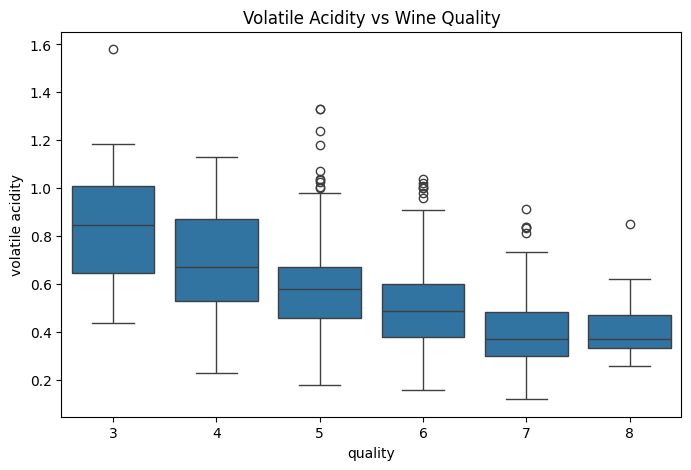

In [8]:
# 4. Volatile Acidity Effect on Quality
plt.figure(figsize=(8,5))
sns.boxplot(x='quality', y='volatile acidity', data=df)
plt.title("Volatile Acidity vs Wine Quality")
plt.show()

In [9]:
# 5. Decision Tree and Random Forest Model Training
X = df.drop(columns=['quality'])
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Decision Tree Model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print(f"Decision Tree Accuracy: {dt_accuracy}")

Decision Tree Accuracy: 0.559375


In [11]:
# Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Random Forest Accuracy: {rf_accuracy}")

Random Forest Accuracy: 0.659375
